# Airline Analysis

In this project, I will imagine that you work for a travel agency and need to know the ins and outs of airline prices for my clients. I want to make sure that I can find the best deal for my client and help them to understand how airline prices change based on different factors.

I decide to look into my favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?


## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
flight = pd.read_csv("flight.csv")
flight.head()

## Task 1



,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


In [3]:
flight.dtypes

miles                       int64
passengers                  int64
delay                       int64
inflight_meal              object
inflight_entertainment     object
inflight_wifi              object
day_of_week                object
redeye                     object
weekend                    object
coach_price               float64
firstclass_price          float64
hours                       int64
dtype: object

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

431.8343773728164
437.115


<AxesSubplot:xlabel='coach_price', ylabel='Count'>

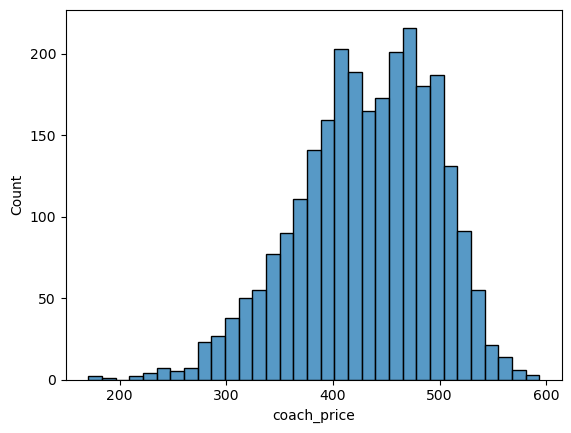

In [4]:
## Task 2
print(np.mean(flight.coach_price[flight.hours == 8]))
print(np.median(flight.coach_price[flight.hours == 8]))

sns.histplot(flight.coach_price[flight.hours == 8])

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. I want to better understand how often there are large delays so I can correctly set up connecting flights. What kinds of delays are typical?

In [5]:
flight.describe(include='all')

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
count,129780.000000,129780.000000,129780.000000,129780,129780,129780,129780,129780,129780,129780.000000,129780.000000,129780.000000
unique,NaN,NaN,NaN,2,2,2,7,2,2,NaN,NaN,NaN
top,NaN,NaN,NaN,No,Yes,Yes,Saturday,No,Yes,NaN,NaN,NaN
freq,NaN,NaN,NaN,90813,104028,116766,33736,123334,84643,NaN,NaN,NaN
mean,2006.224696,207.723155,13.162845,NaN,NaN,NaN,NaN,NaN,NaN,376.585253,1454.931785,3.631214
std,943.034768,12.776363,41.941680,NaN,NaN,NaN,NaN,NaN,NaN,67.744274,162.590434,1.739118
min,12.000000,135.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,44.415000,939.100000,1.000000
25%,1343.000000,204.000000,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,331.445000,1302.200000,2.000000
50%,1986.000000,210.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,380.560000,1503.840000,4.000000
75%,2468.000000,215.000000,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,426.676250,1582.370000,4.000000


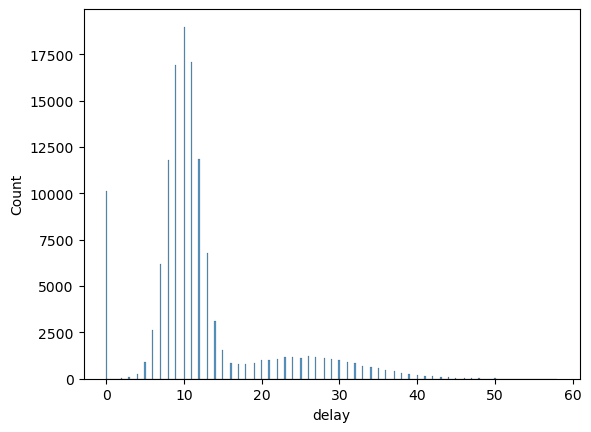

In [6]:
## Task 3
sns.histplot(flight.delay[flight.delay <=800])
plt.show()

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

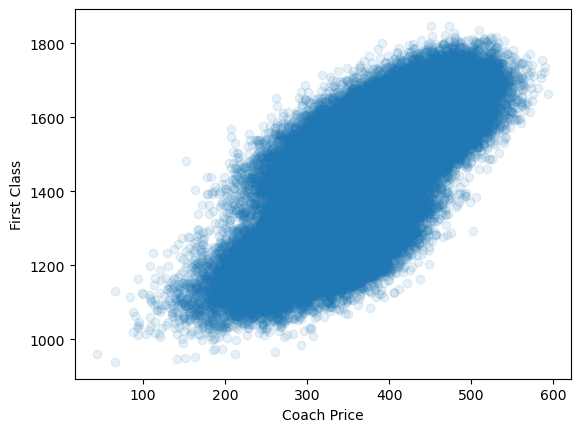

In [7]:
## Task 4
plt.scatter(x = flight.coach_price, y = flight.firstclass_price, alpha=0.1)
plt.xlabel('Coach Price')
plt.ylabel('First Class')
plt.show()

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

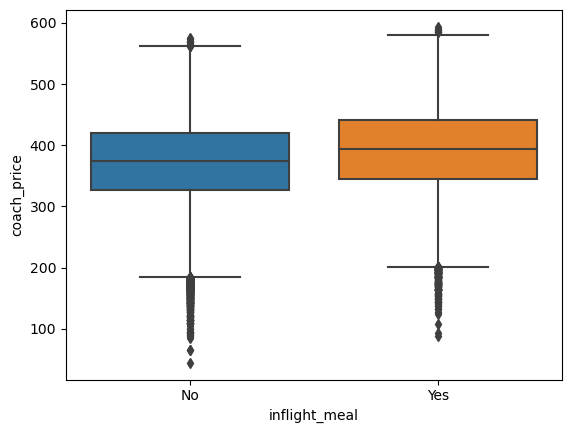

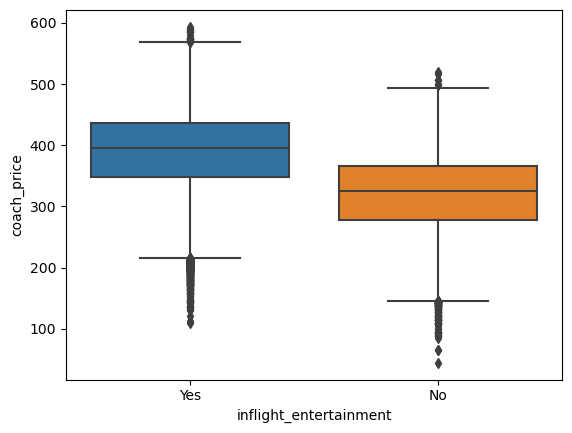

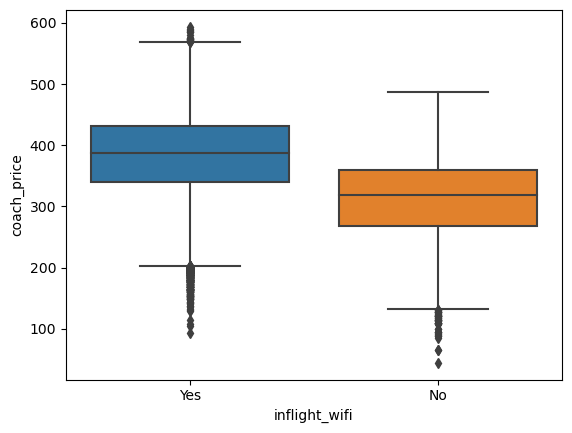

<Figure size 640x480 with 0 Axes>

In [8]:
## Task 5
sns.boxplot(data = flight, x = 'inflight_meal', y = 'coach_price')
plt.show()
plt.clf()

sns.boxplot(data = flight, x = 'inflight_entertainment', y = 'coach_price')
plt.show()
plt.clf()

sns.boxplot(data = flight, x = 'inflight_wifi', y = 'coach_price')
plt.show()
plt.clf()


6. How does the number of passengers change in relation to the length of flights?

In [ ]:
## Task 6
sns.catplot(data=flight, x="miles", y="passengers", jitter=0.1)

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

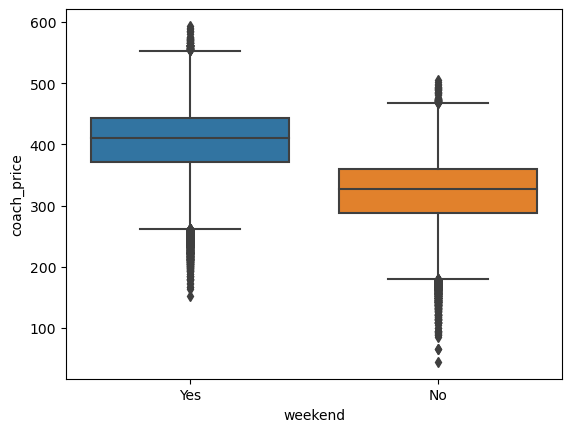

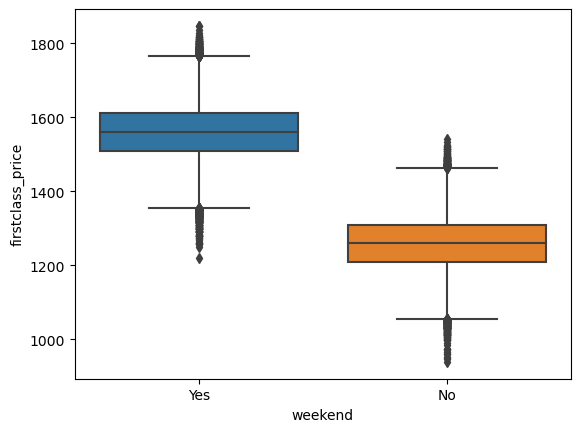

<Figure size 640x480 with 0 Axes>

In [47]:
## Task 7
sns.boxplot(data = flight, x = 'weekend', y = 'coach_price')
plt.show()
plt.clf()

sns.boxplot(data = flight, x = 'weekend', y = 'firstclass_price')
plt.show()
plt.clf()

